# Survival prediction on Titanic Dataset 

### Approach 1 -- Decision Tree Classifier 

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [193]:
df = pd.read_csv('InputLocation/train.csv')

In [194]:
def preprocessing(df):
    df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True, axis=1)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Age'] = df['Age'].fillna(df.Fare.mean())
    df['Fare'] = df['Fare'].fillna(df.Fare.mean())
    return df
preprocessing(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,32.204208,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [195]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [209]:
clf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=5)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [210]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy score is: %f" %accuracy_score(y_test, y_pred))
    
print(pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
))
    
print(classification_report(y_test, y_pred))

accuracy score is: 0.807175
                   Predicted Not Survival  Predicted Survival
True Not Survival                     115                  13
True Survival                          30                  65
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       128
           1       0.83      0.68      0.75        95

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.80       223



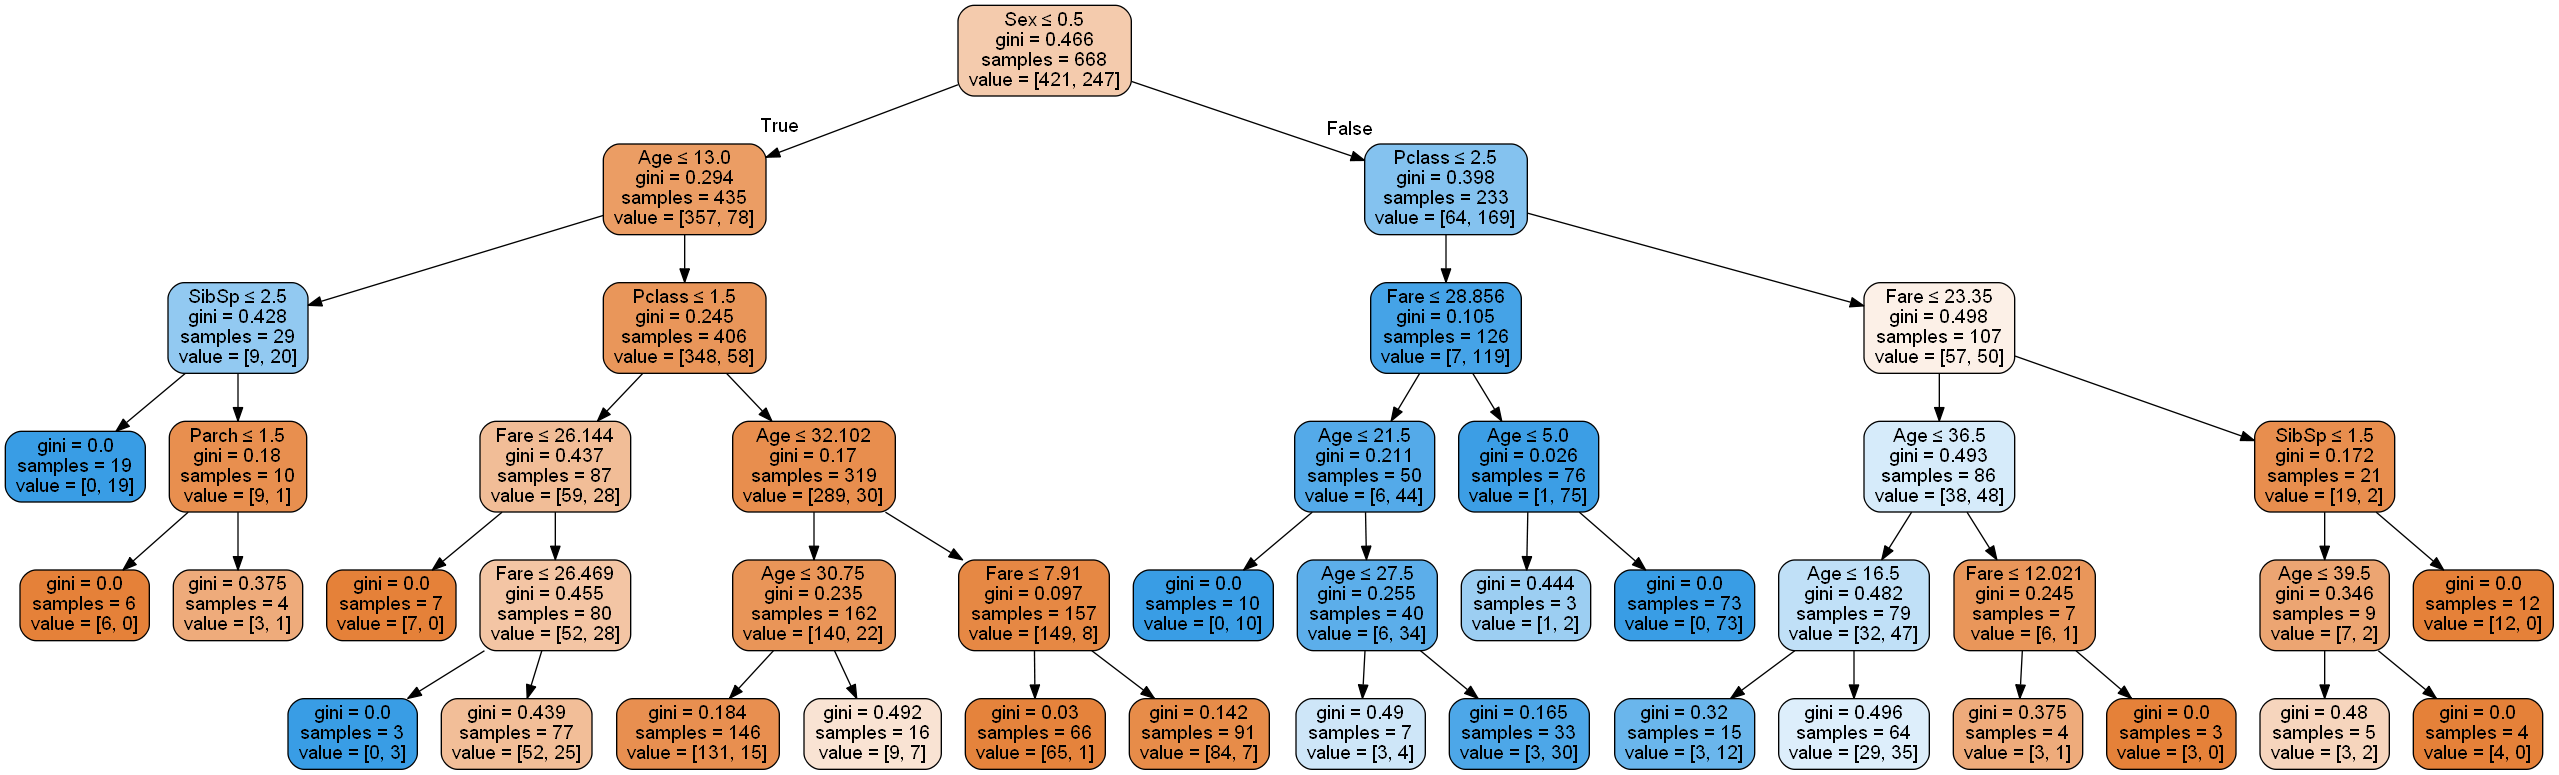

In [211]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [212]:
submit = pd.read_csv('InputLocation/test.csv')
preprocessing(submit)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.500000,0,0,7.8292
1,3,1,47.000000,1,0,7.0000
2,2,0,62.000000,0,0,9.6875
3,3,0,27.000000,0,0,8.6625
4,3,1,22.000000,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,35.627188,0,0,8.0500
414,1,1,39.000000,0,0,108.9000
415,3,0,38.500000,0,0,7.2500
416,3,0,35.627188,0,0,8.0500


In [213]:
y_submit = clf.predict(submit)

In [214]:
output = pd.DataFrame({'Survived': y_submit})
output.to_csv('OutputLocation/output1.csv')